In [1]:
%run ./import_ap.ipynb

import pandas as pd

import apple_pie as ap
import brutils

import matplotlib.pyplot as plt

exp = ap.make_cur_exper()


reading in wells : 0.59 seconds
all exper init : 1.10 seconds


In [2]:
control_df = pd.DataFrame(exp.control.dists)

In [3]:
control_df.apply(pd.DataFrame.describe, axis=1)[:5]

,count,mean,std,min,25%,50%,75%,max
0,385.0,6.902519,7.548472,0.234404,2.399858,4.129300,8.364205,49.972125
1,386.0,7.675174,7.637168,0.090891,2.989137,5.080608,9.042973,45.672531
2,384.0,8.054232,8.592920,0.243207,2.796360,5.037430,9.602821,49.841328
3,392.0,7.838530,7.486993,0.256634,3.041186,5.418176,9.401927,44.189653
4,398.0,9.329824,10.319151,0.140996,2.638802,5.371968,11.635667,47.988849


In [4]:
#%matplotlib notebook
# for group in exp.groups.values() :
#     f = plt.figure()
#     print(group.name)
# print((exp.groups.keys()))
def std_plots(group_name) :
    for condit in exp.groups[group_name].condits.values() : #exp.condits.values() :
        f = plt.figure()


        cdf = pd.DataFrame(exp.control.dists)
        cdf_stats = cdf.apply(pd.DataFrame.describe, axis=1)

        cdf_stats['upper'] = cdf_stats.apply(lambda x: x['mean'] + x['std'], axis=1)
        cdf_stats['lower'] = cdf_stats.apply(lambda x: x['mean'] - x['std'], axis=1)
        cdf_stats['time'] = [x/6 for x in range(1,len(cdf_stats)+1)]

        plt.fill_between(cdf_stats['time'],cdf_stats['lower'],cdf_stats['upper'],alpha=.5)
    #     plt.plot(cdf_stats['time'],cdf_stats['mean'],ls='',marker='o')
        #plt.fill_between(cdf_stats['time'],cdf_stats['lower'],cdf_stats['upper'],alpha=.5,label='std')
        plt.plot(cdf_stats['time'],cdf_stats['mean'],ls='',marker='o',label=exp.control.name)




        cdf = pd.DataFrame(condit.dists)
        cdf_stats = cdf.apply(pd.DataFrame.describe, axis=1)

        cdf_stats['upper'] = cdf_stats.apply(lambda x: x['mean'] + x['std'], axis=1)
        cdf_stats['lower'] = cdf_stats.apply(lambda x: x['mean'] - x['std'], axis=1)
        cdf_stats['time'] = [x/6 for x in range(1,len(cdf_stats)+1)]

    #     plt.fill_between(cdf_stats['time'],cdf_stats['lower'],cdf_stats['upper'],alpha=.5)
    #     plt.plot(cdf_stats['time'],cdf_stats['mean'],ls='',marker='o')
        plt.fill_between(cdf_stats['time'],cdf_stats['lower'],cdf_stats['upper'],alpha=.5,label='std')
        plt.plot(cdf_stats['time'],cdf_stats['mean'],ls='',marker='o',label=condit.name)


        plt.legend()
        ax = plt.gca()
        ax.set_ylim(0,20)
        #f.show()




    #     break

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


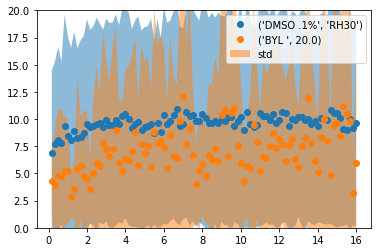

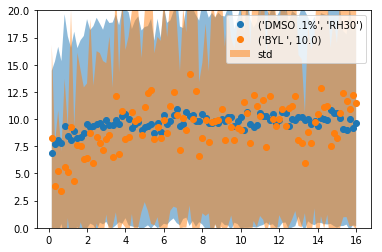

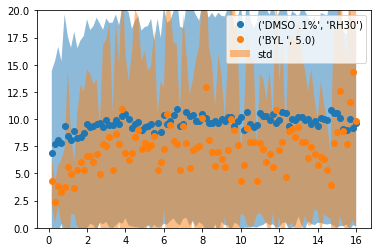

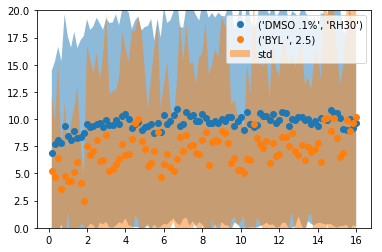

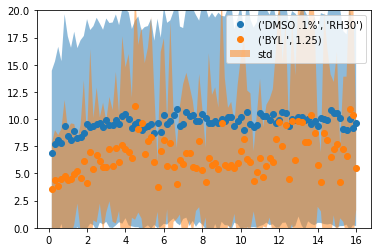

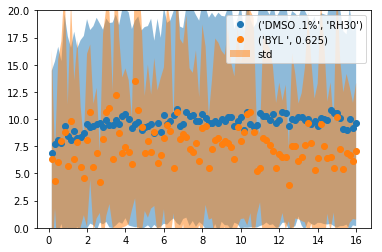

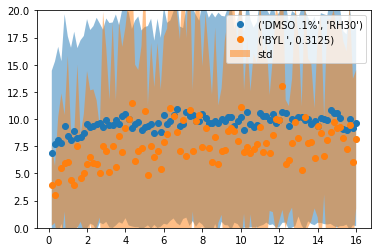

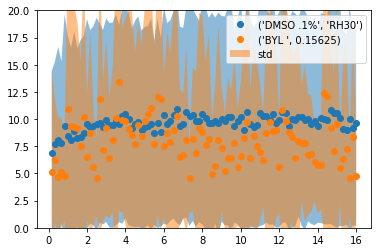

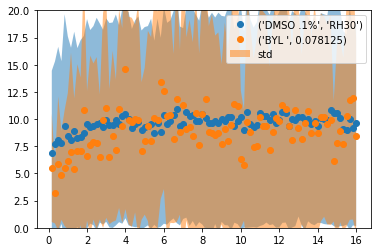

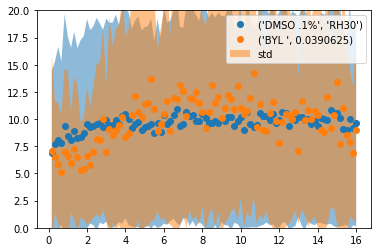

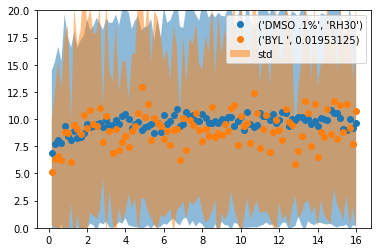

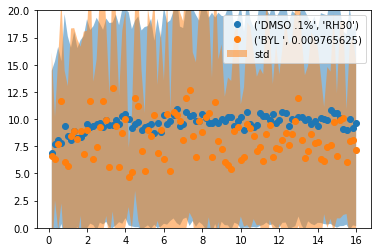

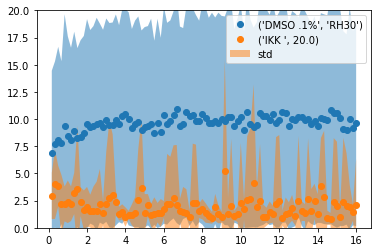

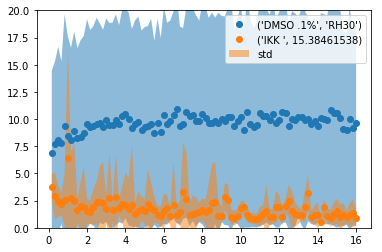

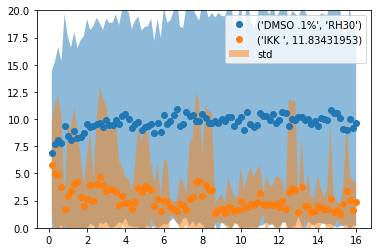

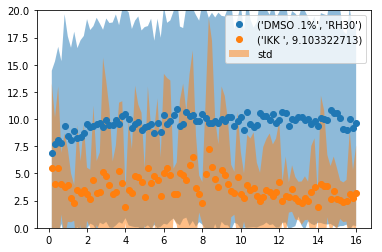

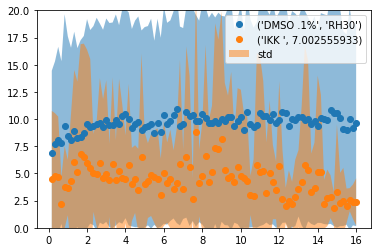

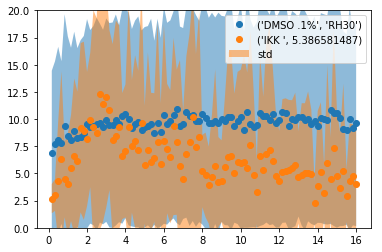

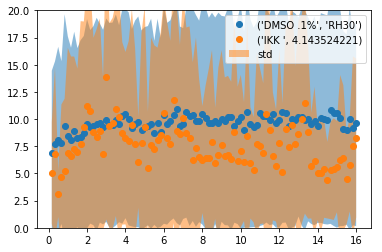

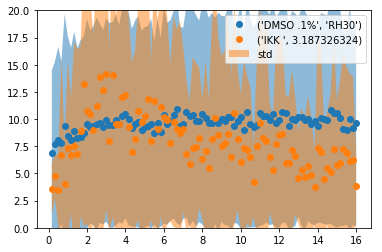

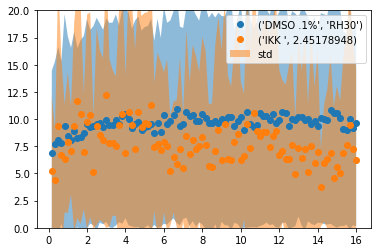

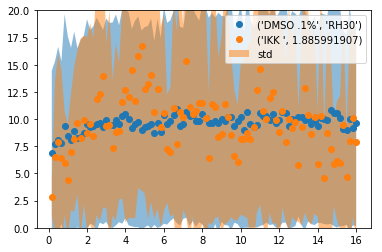

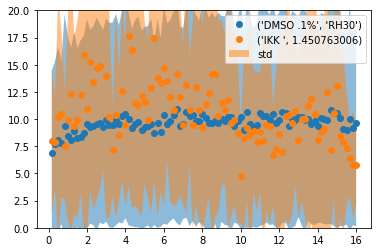

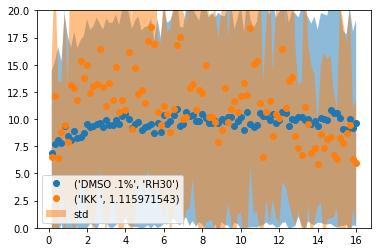

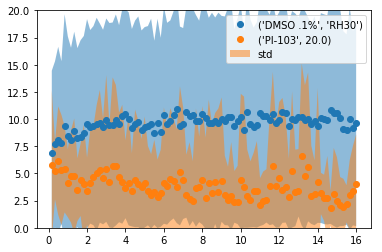

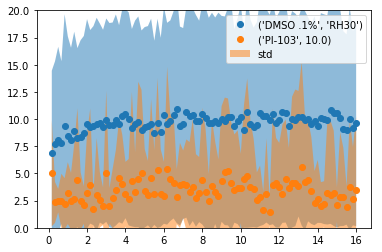

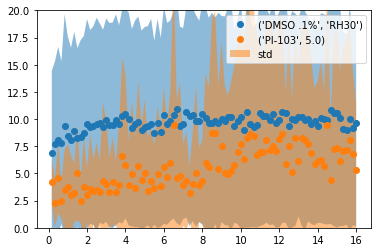

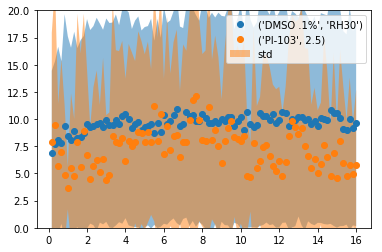

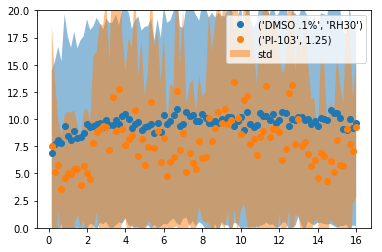

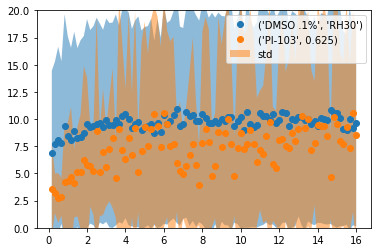

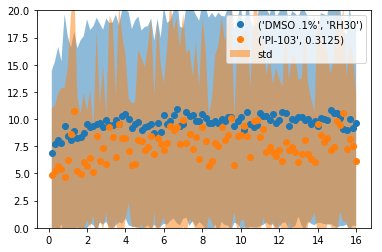

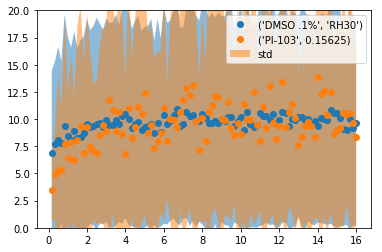

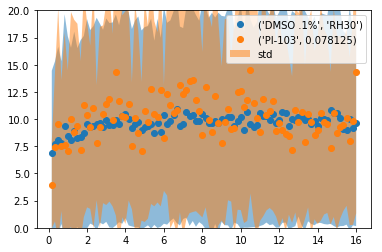

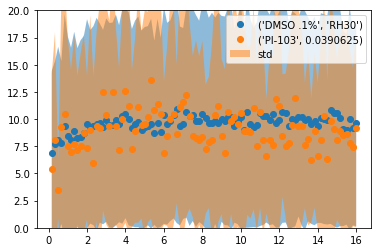

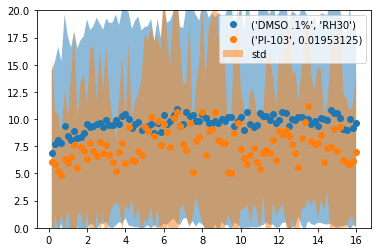

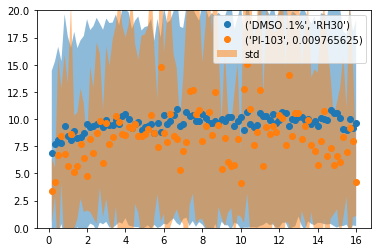

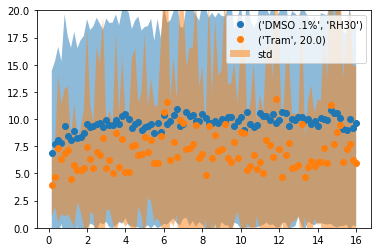

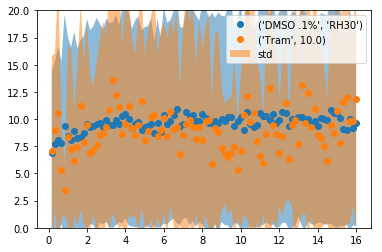

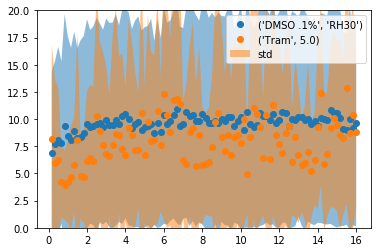

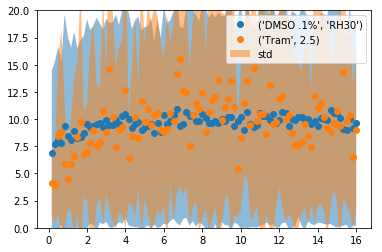

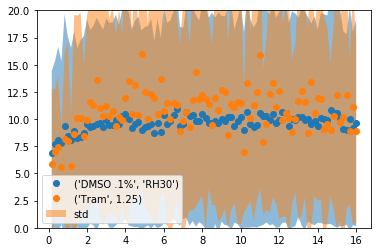

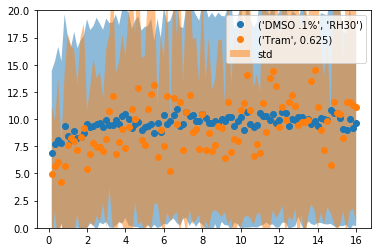

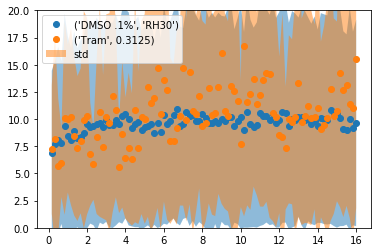

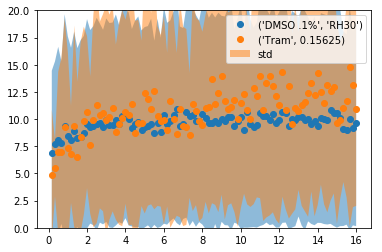

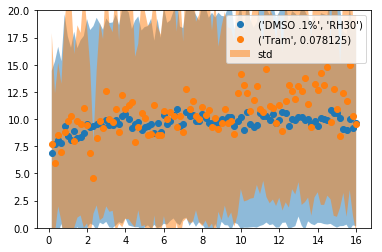

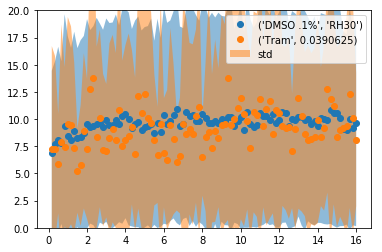

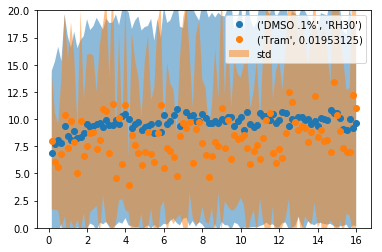

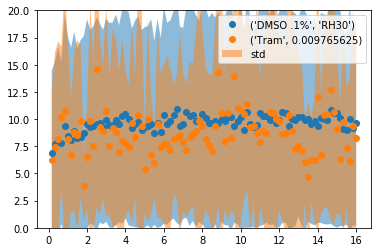

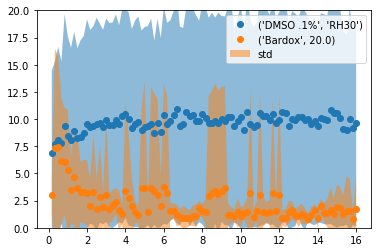

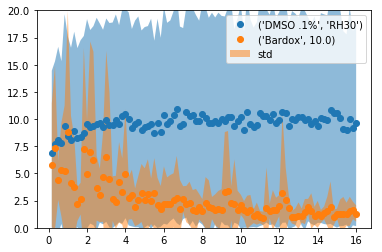

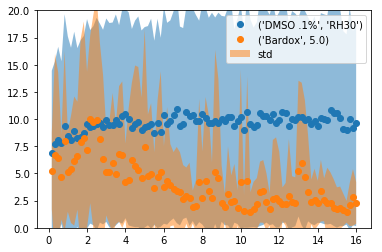

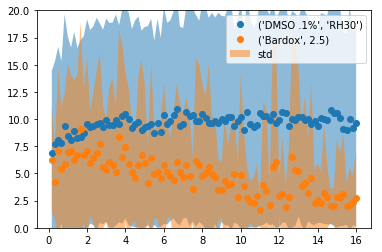

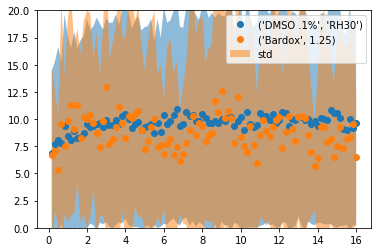

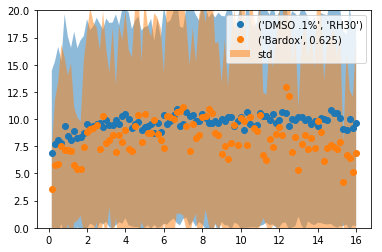

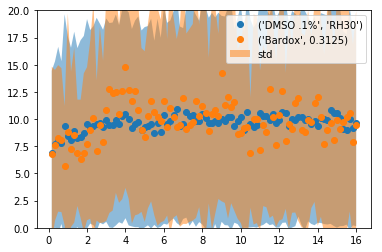

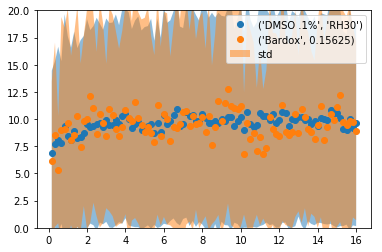

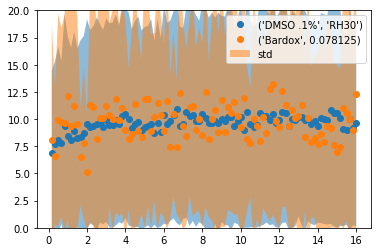

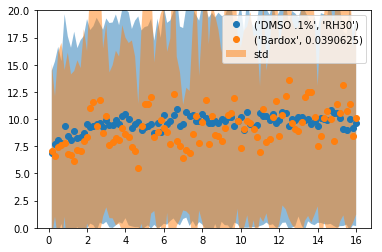

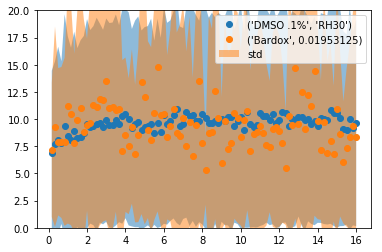

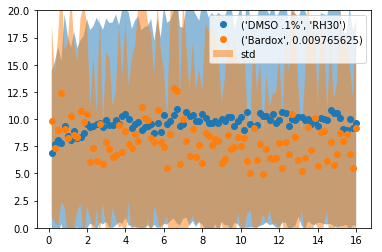

In [5]:
for group_name in exp.groups.keys() :
    std_plots(group_name)